In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import kmos_tools as KT

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[ERROR] Please install the python package `asciitable`.
[ERROR] Please install asciitable.
[DEBUG] loaded rc file /Users/cmason/Documents/Research/code/matplotlibrc
[DEBUG] backend module://ipykernel.pylab.backend_inline version unknown


# Get Mg II z~2 targets from HETDEX pilot

In [2]:
targets_file    = 'targets/HETDEX_apjs375276t3_mrt.txt'
line_props_file = 'targets/HETDEC_apjs375276t4_mrt_lineprops.txt'

In [3]:
targets    = Table.read(targets_file, format='ascii.cds')
line_props = Table.read(line_props_file, format='ascii.cds')
print targets.colnames
print line_props.colnames

['HPS', 'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs', 'Wave', 'FWHM', 'S/N', 'Flux', 'e_Flux', 'E_Flux', 'Spatial', 'e_Spatial', 'E_Spatial', 'Match']
['HPS', 'Counter', 'Rmag', 'Prob', 'EW', 'e_EW', 'E_EW', 'EWint', 'e_EWint', 'E_EWint', 'Trans', 'z', 'Lya', 'X-ray']


In [6]:
LAEs  = []
dtype = [('ID', int), ('RA', 'f8'), ('DEC', 'f8'), ('zspec', 'f8'), ('Rmag', 'f8'), ('flux_Lya', 'f8'), ('EW_Lya', 'f8'), ('FWHM_kms_Lya', 'f8')]

for t, l in zip(targets, line_props):
    if 1.6 <= l['z'] < 2.5 and l['Lya'] > 0.5 and t['RAh'] == 12:
        coords = '%.0f %.0f %.2f %.0f %.0f %.2f' % (t['RAh'], t['RAm'], t['RAs'], t['DEd'], t['DEm'], t['DEs'])
        c = SkyCoord(coords, unit=(u.hourangle, u.deg))
        LAEs.append((t['HPS'], c.ra.deg, c.dec.deg, l['z'], l['Rmag'], t['Flux'], l['EW'], t['FWHM']))
LAEs = np.array(LAEs)#, dtype=dtype)
print LAEs[0]

[395.         189.18275     62.23611111   2.2734      24.09
  20.4         39.2        635.        ]


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Warning: converting a masked element to nan.
  if __name__ == '__main__':


In [9]:
header = """z~2 LAEs from Adams+2010 HETDEX pilot survey https://doi.org/10.1088/0067-0049/192/1/5
Mg II emitters at ~8000A??
%s""" % '\t'.join(list([d[0] for d in dtype]))
print header

np.savetxt('targets/HETDEX_Adams2010_z2LAEs.txt', LAEs, fmt='%.6f', header=header)

z~2 LAEs from Adams+2010 HETDEX pilot survey https://doi.org/10.1088/0067-0049/192/1/5
Mg II emitters at ~8000A??
ID	RA	DEC	zspec	Rmag	flux_Lya	EW_Lya	FWHM_kms_Lya


In [45]:
# sorted_LAEs = np.sort(LAEs)#, order=3)
print LAEs
print [d[0] for d in dtype]
print sorted_LAEs

[[3.95000000e+02 1.89182750e+02 6.22361111e+01 2.27340000e+00
  2.40900000e+01 2.04000000e+01 3.92000000e+01 6.35000000e+02]
 [4.01000000e+02 1.89193458e+02 6.22460556e+01 2.00200000e+00
             nan 1.03200000e+02 3.77490000e+03 1.11800000e+03]
 [4.19000000e+02 1.89208500e+02 6.22335278e+01 2.23490000e+00
  2.45700000e+01 2.44000000e+01 7.23000000e+01 4.76000000e+02]
 [4.34000000e+02 1.89226125e+02 6.22266667e+01 2.26590000e+00
  2.68900000e+01 1.19000000e+01 2.98900000e+02 2.89000000e+02]
 [4.36000000e+02 1.89228917e+02 6.22284722e+01 2.41920000e+00
  2.54100000e+01 7.50000000e+00 5.11000000e+01 3.22000000e+02]
 [4.62000000e+02 1.89268708e+02 6.22462778e+01 2.21280000e+00
  2.43900000e+01 7.89000000e+01 1.95400000e+02 5.46000000e+02]]
['ID', 'RA', 'DEC', 'zspec', 'Rmag', 'flux_Lya', 'EW_Lya', 'FWHM_kms_Lya']
[[2.27340000e+00 2.04000000e+01 2.40900000e+01 3.92000000e+01
  6.22361111e+01 1.89182750e+02 3.95000000e+02 6.35000000e+02]
 [2.00200000e+00 6.22460556e+01 1.03200000e+02 1.

# Alaina Mg II emitters

In [21]:
W_MgII2796     = np.array([2.9, 5.1, 3.0, 2.7, 6.2, 4.4, 9.1, 5.4, 0.4, 6.3])
W_MgII2796_err = np.array([0.4, 0.5, 0.3, 0.4, 0.5, 0.4, 0.4, 0.3, 0.5, 0.7])
W_MgII2803     = np.array([1.9, 2.9, 1.6, 1.8, 3.7, 1.6, 5.3, 4.3, 1.4, 2.7])
W_MgII2803_err = np.array([0.3, 0.5, 0.2, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.6])
W_Lya1         = np.array([59., 40., 12., 35., 164.,48., 98., 95., 33., 115.])
W_Lya1_err     = np.array([12., 8.,  3.,  7.,  33., 10., 20., 19., 7.,  23.])

W_MgII     = np.hstack((W_MgII2796, W_MgII2803))
W_MgII_err = np.hstack((W_MgII2796_err, W_MgII2803_err))
W_Lya      = np.hstack((W_Lya1, W_Lya1))
W_Lya_err  = np.hstack((W_Lya1_err, W_Lya1_err))

Starting place: LinregressResult(slope=0.02718480304466145, intercept=1.7347822671781647, rvalue=0.5824713243329201, pvalue=0.007041584832750996, stderr=0.008941831203131015)
[##############################]Mean acceptance fraction: 0.641


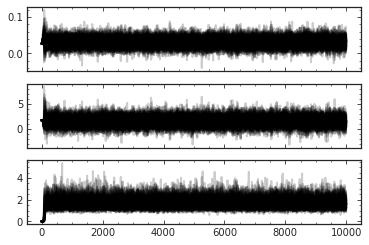

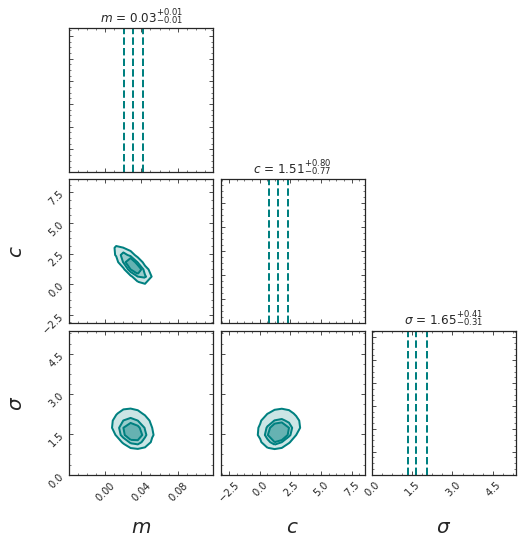

(0.030688302271312026, 0.010580292145294861, 0.010435698033621241)
(1.5078459469853243, 0.8013132742505606, 0.7749777857516285)


In [26]:
slope, intercept, s = KT.fitters.linear_emcee(x=W_Lya, y=W_MgII, xerr=W_Lya_err, yerr=W_MgII_err, 
                                  return_samples=False)

print slope
print intercept

Text(0,0.5,'MgII EW')

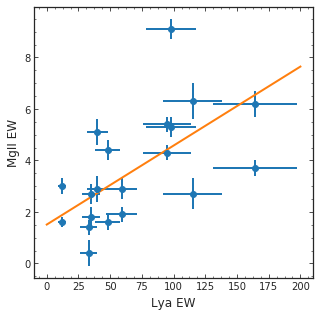

In [27]:
W_Lya_tab = np.linspace(0., 200.)
W_Mg_tab  = slope[0]*W_Lya_tab + intercept[0]

plt.figure(figsize=(5,5))
plt.errorbar(W_Lya, W_MgII, xerr=W_Lya_err, yerr=W_MgII_err, fmt='o')
plt.plot(W_Lya_tab, W_Mg_tab)
plt.xlabel('Lya EW')
plt.ylabel('MgII EW')

In [50]:
pred_MgII_EW = 2*slope[0]*sorted_LAEs['EW_Lya'] + intercept[0]
print pred_MgII_EW

ztest = 2.3
# print sorted_LAEs['Rmag']
fcont_MgII = KT.f_cont(m=sorted_LAEs['Rmag'], wave=(1. + ztest)*2800)

flux_MgII = pred_MgII_EW * fcont_MgII * (1. + ztest)

print np.sort(flux_MgII)/Binospec_1sigma

[233.19839043  13.50083447   5.94537446  19.85331304   3.91380885
   4.64419044]
[ 1.91482673  2.09436539  5.3137201   5.44275858 14.24229817         nan]


In [46]:
# What is minimum Mg II EW we could observe?
Binospec_1sigma = 7.e-19 # erg/s/cm^2
SN_detect = 5.

fcont_MgII = KT.f_cont(m=24.5, wave=(1. + ztest)*2800)

MgII_EW = SN_detect*Binospec_1sigma/fcont_MgII/(1.+2.3)/2.
print MgII_EW

2.62253049928
